# RDKit

In [19]:
LIBRARY='rdkit'

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import pickle
from IPython.display import clear_output

In [21]:
# np.random.seed(200) #-- works for lin reg
np.random.seed(110)

# Data

In [22]:
data_train=pd.read_csv('../DATA_train.csv')
data_test=pd.read_csv('../DATA_test.csv')
data_train.shape,data_test.shape

((129, 3857), (56, 3857))

In [23]:
data_train

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,FG_position_4_2d_basic,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
0,148,OH,1 2 8,-1.82,OH_R128_neutral,17,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,13,SH,1,-1.66,SH_R1_neutral,20,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,152,OH,2 3 7,-1.93,OH_R237_neutral,17,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,34,COOH,1,-1.30,COOH_R1_neutral,11,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24,Cl,2,-1.63,Cl_R2_neutral,12,0.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,45,CN,1 6,-1.14,CN_R16_neutral,7,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
125,40,NO2,1,-1.35,NO2_R1_neutral,15,1.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
126,112,NH2,1 4 7,-2.05,NH2_R147_neutral,14,1.0,0.0,0.0,1.0,...,0,0,1,0,0,1,0,1,0,0
127,183,NO2,1 2 4 8,-0.30,NO2_R1248_neutral,15,1.0,1.0,0.0,1.0,...,1,0,1,1,0,1,0,1,0,0


In [24]:
data_test

,Sr. No.,FG_name,FG Position,Redox Potential,mol_filename_neutral,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,FG_position_4_2d_basic,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
0,65,CN,2 3 7,-0.89,CN_R237_neutral,7,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,12,S(CH3)2,2,-1.77,S(CH3)2_R2_neutral,19,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,0
2,96,NH2,1 8,-2.02,NH2_R18_neutral,14,1.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
3,184,NO2,1 2 4 9,-0.34,NO2_R1249_neutral,15,1.0,1.0,0.0,1.0,...,1,0,1,1,0,1,0,1,0,0
4,10,P(CH3)2,2,-1.75,P(CH3)2_R2_neutral,18,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,155,OH,1 2 3 7,-1.87,OH_R1237_neutral,17,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,153,OH,1 2 3 4,-1.78,OH_R1234_neutral,17,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,17,C6H5,1,-1.76,C6H5_R1_neutral,2,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
8,172,NO2,1 9,-1.14,NO2_R19_neutral,15,1.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,1,0,0
9,4,NH2,2,-1.92,NH2_R2_neutral,14,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
#TEST DATA
# size=10
# feat_2d=[col for col in data_train.columns if f'2d_{LIBRARY}' in col][:size]
# feat_3d=[col for col in data_train.columns if f'3d_{LIBRARY}' in col][:size]
# feat_3d=[col for col in data_train.columns if f'_fp_' in col][:size]
# feat_cols=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral']+feat_2d+feat_3d+feat_fp
# data_train=data_train[feat_cols]
# data_test=data_test[feat_cols]
# data_train.shape,data_test.shape

((129, 35), (56, 35))

# Preprocessing

In [26]:
from sklearn.model_selection import train_test_split

X_train=data_train.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral'])
X_test=data_test.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral'])
y_train=data_train['Redox Potential']
y_test=data_test['Redox Potential']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 30) (129,)
(56, 30) (56,)


In [27]:
from sklearn.preprocessing import StandardScaler

numerical_cols=[col for col in X_train.columns if '_2d_rdkit' in col]
numerical_cols+=[col for col in X_train.columns if '_3d_rdkit' in col]
numerical_cols+=[col for col in X_train.columns if '_2d_mordred' in col]
numerical_cols+=[col for col in X_train.columns if '_3d_mordred' in col]
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()
for col in numerical_cols:
    scaler=StandardScaler().fit(X_train[col].values.reshape(-1,1))
    X_train_scaled[col]=scaler.transform(X_train[col].values.reshape(-1,1))
    X_test_scaled[col]=scaler.transform(X_test[col].values.reshape(-1,1))

In [30]:
feat_cols_2d_3d_fp=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
feat_cols_2d_3d_fp+=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
feat_cols_2d_3d_fp+=[col for col in X_train_scaled.columns if '_fp_' in col]
X_train_scaled_2d_3d_fp=X_train_scaled[feat_cols_2d_3d_fp]
X_test_scaled_2d_3d_fp=X_test_scaled[feat_cols_2d_3d_fp]

feat_cols_2d_3d=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
feat_cols_2d_3d+=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
X_train_scaled_2d_3d=X_train_scaled[feat_cols_2d_3d]
X_test_scaled_2d_3d=X_test_scaled[feat_cols_2d_3d]

feat_cols_2d=[col for col in X_train_scaled.columns if f'_2d_{LIBRARY}' in col]
X_train_scaled_2d=X_train_scaled[feat_cols_2d]
X_test_scaled_2d=X_test_scaled[feat_cols_2d]

feat_cols_3d=[col for col in X_train_scaled.columns if f'_3d_{LIBRARY}' in col]
X_train_scaled_3d=X_train_scaled[feat_cols_3d]
X_test_scaled_3d=X_test_scaled[feat_cols_3d]

feat_cols_fp=[col for col in X_train_scaled.columns if f'_fp_' in col]
X_train_scaled_fp=X_train_scaled[feat_cols_fp]
X_test_scaled_fp=X_test_scaled[feat_cols_fp]

print(X_train_scaled_2d_3d_fp.shape,X_test_scaled_2d_3d_fp.shape)
print(X_train_scaled_2d_3d.shape,X_test_scaled_2d_3d.shape)
print(X_train_scaled_2d.shape,X_test_scaled_2d.shape)
print(X_train_scaled_3d.shape,X_test_scaled_3d.shape)

(129, 30) (56, 30)
(129, 30) (56, 30)
(129, 15) (56, 15)
(129, 15) (56, 15)


# Examples

## - Baseline Models

### 1. Linear Regression

R^2 = 0.9580874094467361


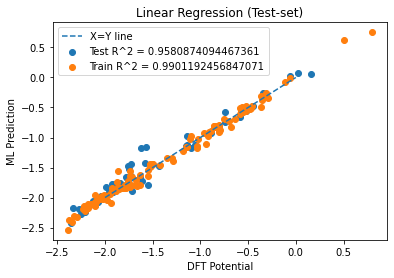

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_scaled, y_train)

y_pred=reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)

y_pred_train=reg.predict(X_train_scaled)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Linear Regression (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

### 2. SVR

R^2 = 0.8564577763499703


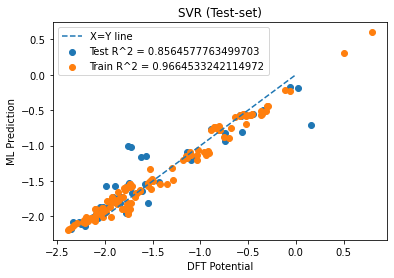

In [32]:
from sklearn.svm import SVR

svr=SVR(C=2, epsilon=0.2).fit(X_train_scaled, y_train)

y_pred=svr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)


y_pred_train=svr.predict(X_train_scaled)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('SVR (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

### 3. Gradient Boosting Regression

R^2 = 0.8322795932892785


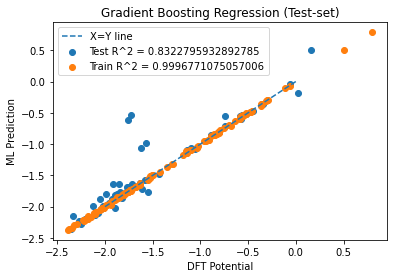

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor().fit(X_train_scaled, y_train)

y_pred=gbr.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)

y_pred_train=gbr.predict(X_train_scaled)
r2_train=r2_score(y_train,y_pred_train)

print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'Test R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Gradient Boosting Regression (Test-set)')

plt.scatter(y_train,y_pred_train,label=f'Train R^2 = {r2_train}')

plt.legend()

## - Hyper-Parameter Tuning (Kernel Ridge Regression)

{'alpha': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'}
R^2 = 0.73812423970652
R^2 = 0.9681873621938893


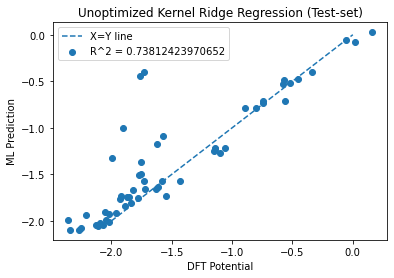

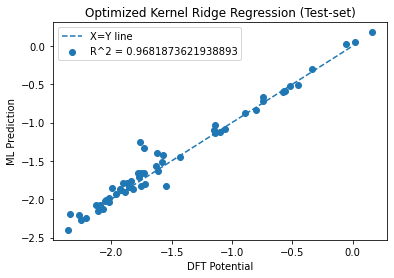

In [34]:
from IPython import display
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

param_grid={'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
            'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
            'alpha':np.linspace(1e-4,1,10)}

scoring = ['neg_mean_squared_error','r2']

estimator = KernelRidge()

krr_gs = GridSearchCV(estimator,
                  param_grid=param_grid,
                  scoring=scoring,
                  refit='neg_mean_squared_error',
                  return_train_score=True,
                  cv=10,
                  verbose=1,
                  n_jobs=-1
                 )
krr_gs.fit(X_train_scaled, y_train)
display.clear_output()
print(krr_gs.best_params_)

plt.figure()
krr_reg = KernelRidge(kernel='rbf').fit(X_train_scaled, y_train)
y_pred=krr_reg.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Unoptimized Kernel Ridge Regression (Test-set)')
plt.legend()

plt.figure()
y_pred=krr_gs.best_estimator_.predict(X_test_scaled)
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title('Optimized Kernel Ridge Regression (Test-set)')
plt.legend()

## Feature Importance

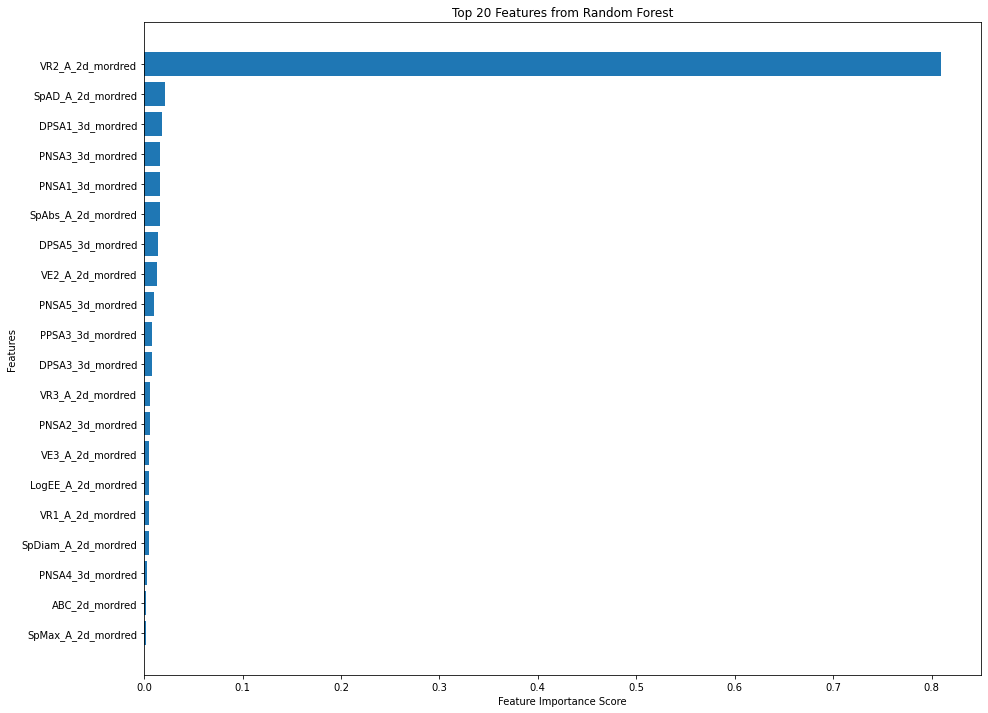

In [35]:
from sklearn.ensemble import RandomForestRegressor

feat_idx2name={idx:col for idx,col in enumerate(X_train.columns)}
feat_name2idx={col:idx for idx,col in enumerate(X_train.columns)}
feat_name_list=X_train.columns

ntop=20
rf_reg=RandomForestRegressor().fit(X_train_scaled, y_train)
rf_feat_score = rf_reg.feature_importances_
rf_feat_score_sorted_idx=rf_feat_score.argsort()
plt.figure(figsize=(15,12))
rf_top_features=list(map(lambda x:feat_idx2name[x],rf_feat_score_sorted_idx))
plt.barh(rf_top_features[-ntop:],rf_feat_score[rf_feat_score_sorted_idx][-ntop:])
plt.ylabel('Features')
plt.xlabel('Feature Importance Score')
plt.title('Top 20 Features from Random Forest')
plt.show()

## - Model Performance on Top 20 Features (CV)

(129, 30) (56, 30)
R^2 = -4.15631804607295


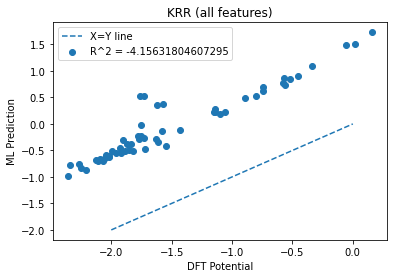

(129, 20) (56, 20)
R^2 = -4.062425627248983


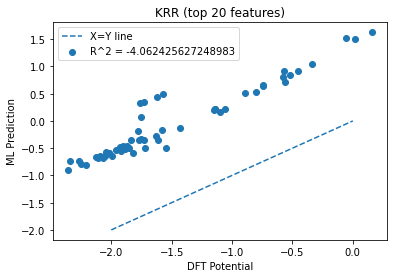

In [36]:
from sklearn.kernel_ridge import KernelRidge

print(X_train_scaled.shape,X_test_scaled.shape)
krr_reg=KernelRidge().fit(X_train_scaled, y_train)
y_pred=krr_reg.predict(X_test_scaled)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'KRR (all features)')
plt.legend()
plt.show()

plt.figure()
ntop=20
rf_top_features_idx=list(map(lambda x:feat_name2idx[x],rf_top_features))
_X_train,_X_test=X_train_scaled.iloc[:,rf_top_features_idx[-ntop:]],X_test_scaled.iloc[:,rf_top_features_idx[-ntop:]]
print(_X_train.shape,_X_test.shape)
krr_reg =KernelRidge().fit(_X_train, y_train)
y_pred=krr_reg.predict(_X_test)
y_true=y_test
r2=r2_score(y_test,y_pred)
print(f'R^2 = {r2}')
plt.scatter(y_test,y_pred,label=f'R^2 = {r2}')
plt.plot(np.linspace(-2,0),np.linspace(-2,0),ls='dashed',label='X=Y line')
plt.xlabel('DFT Potential')
plt.ylabel('ML Prediction')
plt.title(f'KRR (top 20 features)')
plt.legend()


# Multiple Models

## Unoptimized Models

## Optimized Models (Hyper-parameter Tuning)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,DotProduct, WhiteKernel,RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor



MODELS_DICT_UNOPT={'linear_reg':LinearRegression(),
             'ridge':Ridge(),
             'lasso':Lasso(),
#              'multitask_lasso':MultiTaskLasso(),
             'elastic_net':ElasticNet(),
#              'multitask_elastic_net':MultiTaskElasticNet(),
#              'lars':Lars(n_nonzero_coefs=50),
             'lasso_lars':LassoLars(),
             'omp':OrthogonalMatchingPursuit(),
             'bayesian_ridge':BayesianRidge(),
             'ARDR':ARDRegression(),
             'PA':PassiveAggressiveRegressor(),
#              'RANSAC':RANSACRegressor(min_samples=129)),
             'huber':HuberRegressor(epsilon=1,
                                     alpha=1e-3,
                                     tol=1e-6,
                                     max_iter=50000),
#              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
#                                                ('linear', LinearRegression(fit_intercept=True))]),
             'kernel_ridge':KernelRidge(kernel='rbf'),
             'SVR':SVR(),
             'gaussian_process':GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel()),
             'decision_tree':DecisionTreeRegressor(),
             'bagging':BaggingRegressor(),
             'random_forest':RandomForestRegressor(),
             'ada_boost':AdaBoostRegressor(),
             'gradient_boosting_reg':GradientBoostingRegressor(),
#              'hist_gradient_boosting_reg':HistGradientBoostingRegressor(),
             'neural_network':MLPRegressor(hidden_layer_sizes=(50,20),
                                            max_iter=10000),
             'knn_reg':KNeighborsRegressor()
            }

PARAM_GRID_DICT={'linear_reg':{'fit_intercept':[True,False],
                               'normalize':[True,False],
                               'positive':[True,False]
                              },
                 'ridge':{'alpha':[0.5,1,1.5],
                          'tol':[1e-3,1e-4,1e-5],
                          'max_iter':[500,1000,5000],
                          'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                         },
                 'lasso':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                          'positive':[True,False],
                          'tol':[1e-4,1e-5,1e-6,1e-7],
                          'max_iter':[100,200,500,1000],
                         },
    #              'multitask_lasso':MultiTaskLasso(),
                 'elastic_net':{'alpha':[0.5,1,1.5],
                                'l1_ratio':[0.2,0.5,0.8],
                                'positive':[True,False],
                                'tol':[1e-3,1e-4,1e-5],
                                'max_iter':[500,1000,5000]
                               },
    #              'multitask_elastic_net':MultiTaskElasticNet(),
    #              'lars':Lars(n_nonzero_coefs=50),
                 'lasso_lars':{'alpha':[1e-2,0.1,0.2,0.5,0.8,1],
                                'jitter':[None,0.1,1,10,100],
                                'positive':[True,False],
                                'max_iter':[100,200,500,1000],
                               },
                 'omp':{#'n_nonzero_coefs':[None,5,10,20],
    #                   'tol':[0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7]
                       },
                 'bayesian_ridge':{'n_iter':[200,300,500],
                                   'tol':[1e-2,1e-3,1e-4],
                                   'alpha_1':[1e-5,1e-6,1e-7],
                                   'alpha_2':[1e-5,1e-6,1e-7],
                                   'lambda_1':[1e-5,1e-6,1e-7],
                                   'lambda_2':[1e-5,1e-6,1e-7],
                                  },
                 'ARDR':{'n_iter':[200,300,500],
                         'tol':[1e-2,1e-3,1e-4],
                         'alpha_1':[1e-5,1e-6,1e-7],
    #                      'alpha_2':[1e-5,1e-6,1e-7],
                         'lambda_1':[1e-5,1e-6,1e-7],
    #                      'lambda_2':[1e-5,1e-6,1e-7],
    #                      'threshold_lambda':[5000,10000,20000]
                        },
                 'PA':{'C':[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.15],
                       'max_iter':[100,200,500,1000,1500,2000],
                       'tol':[1e-5,1e-6,1e-7,1e-8],
    #                    'early_stopping':[True,False],
    #                    'average':[True,False],
    #                    'validation_fraction':[0.05,0.1,0.2]
                      },
    #              'RANSAC':RANSACRegressor(min_samples=129)),
                 'huber':{'epsilon':[1,1.35,1.5],
                          'alpha':[1e-3,1e-4,1e-5],
                          'tol':[1e-5,1e-6,1e-7],
                          'max_iter':[1000,50000]
                         },
    #              'polynomial_features':Pipeline([('poly', PolynomialFeatures(degree=3)),
    #                                                ('linear', LinearRegression(fit_intercept=True))]),
                 'kernel_ridge':{'kernel': ['chi2', 'linear','polynomial', 'rbf', 'laplacian', 'sigmoid', 'cosine'],
                                 'gamma': [1e-8,1e-7,1e-6,1e-5,1e-3, 1e-4],
                                 'alpha':[0.01,0.1,1,5,10,100]
                                },
                 'SVR':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                        'C':[0.5,1,1.5],
                        'tol':[1e-2,1e-3,1e-4],
                        'gamma':['scale','auto']
                       },
                 'gaussian_process':{'kernel':[DotProduct()+WhiteKernel(),
                                               RBF()+WhiteKernel(),
                                               34.4**2 * RBF(length_scale=41.8)
                                                + 3.27**2 * RBF() * ExpSineSquared()
                                                + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957)
                                                + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336),
                                               ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) * RBF(length_scale=0.5, length_scale_bounds=(0.0, 10.0)) + RBF(length_scale=2.0, length_scale_bounds=(0.0, 10.0))
                                              ],
                                     'alpha':[1e-9,1e-10,1e-11]
                                    },
                 'decision_tree':{#'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
    #                               'splitter':['best','random'],
    #                               'max_features':['auto', 'sqrt', 'log2'],
    #                               'ccp_alpha':[-1,0,0.1,0.5,1],
                                  'max_depth':[None,10,20,50,100,200]
                                 },
                 'bagging':{'n_estimators': np.arange(50,1000,50),
                            'bootstrap':[True,False],
                            'bootstrap_features':[True,False],
                            'oob_score':[True,False]
                           },
                 'random_forest':{'n_estimators': np.arange(50,501,50),
                                  'bootstrap':[True,False],
                                  'oob_score':[True,False],
    #                               'criterion':['mse', 'mae'],
    #                               'max_features':['auto', 'sqrt', 'log2'],
    #                               'ccp_alpha':[0,0.5,1]
                                  },
                 'ada_boost':{'n_estimators': np.arange(50,501,50),
                              'learning_rate':[0.5,1,1.5],
                              'loss':['linear', 'square', 'exponential']
                             },
                 'gradient_boosting_reg':{#'loss':['ls', 'lad', 'huber', 'quantile'],
    #                                       'learning_rate':[0.5,1,1.5],
                                          'n_estimators': np.arange(50,501,50),
    #                                       'criterion':['friedman_mse', 'mse', 'mae'],
                                          'max_depth':[2,3,10,20,50],
    #                                       'max_features':['auto', 'sqrt', 'log2'],
    #                                       'alpha':[0.6,0.9,1.2],
                                          'tol':[1e-2,1e-3,1e-4],
    #                                       'ccp_alpha':[0.5,1,1.5]
                                         },
    #              'hist_gradient_boosting_reg':{},
                 'neural_network':{'hidden_layer_sizes':[(10,10,10),(50,30,20),(80,60,30)],
                                   'activation':['logistic', 'tanh', 'relu'],
                                   'solver':['lbfgs', 'sgd', 'adam'],
                                   'learning_rate':['constant', 'invscaling', 'adaptive'],
                                   'early_stopping':[True,False]
                                  },
                 'knn_reg':{'n_neighbors':np.arange(1,10,2),
                            'weights':['uniform', 'distance'],
                            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                            'leaf_size':[40,50,75]
                           }
                }
print(f'Total Models = {len(PARAM_GRID_DICT)}')
print(f'Total Models = {len(MODELS_DICT_UNOPT)}')

Total Models = 20
Total Models = 20


In [63]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def gridSearch(feat_type,X,y,models_dict_unopt,param_grid_dict,read=False):
    outfile_name=f'MODEL_OPT_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_df
        else:
            pass
        
    gs_results_dict={'feat_set':[],'model_name':[],'opt_model':[],'opt_params':[],}
    scoring='neg_mean_squared_error'
    # test_model='PA'
    # for model_name,param_grid in [(test_model,param_grid_dict[test_model])]:
    for model_name,param_grid in param_grid_dict.items():
        print(model_name)
        unopt_estimator=models_dict_unopt[model_name]
        gs = GridSearchCV(unopt_estimator,
                          param_grid=param_grid,
                          scoring=scoring,
                          refit=True,
                          return_train_score=False,
                          cv=10,
                          verbose=2,
                          n_jobs=-1
                         )
        gs.fit(X, y)
        gs_results_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        gs_results_dict['model_name'].append(model_name)
        gs_results_dict['opt_model'].append(gs.best_estimator_)
        gs_results_dict['opt_params'].append(gs.best_params_)
    clear_output()
    model_opt_df=pd.DataFrame.from_dict(gs_results_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(model_opt_df,outfile)
    return model_opt_df

def cv(feat_type,opt_models,X,y,read=False):
    outfile_name=f'CV_RESULT_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_d
        else:
            pass
    
    num_folds=10
    cv_result_dict={'feat_set':[],'model_name':[],'cv_mean_test_r2':[],'cv_mean_test_mse':[],'cv_mean_test_mae':[]}
    scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error']
    pbar=tqdm(opt_models.iterrows())
    for idx,row in pbar:
        model_name=row['model_name']
        pbar.set_description(model_name)
        model=row['opt_model']
        scores=cross_validate(model,
                              X,
                              y,
                              cv=num_folds,
                              scoring=scoring,
                              n_jobs=-1
                             )
                            
        cv_mean_test_r2=scores['test_r2'].mean()
        cv_mean_test_mse=-scores['test_neg_mean_squared_error'].mean()
        cv_mean_test_mae=-scores['test_neg_mean_absolute_error'].mean()
        cv_result_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        cv_result_dict['model_name'].append(model_name)
        cv_result_dict['cv_mean_test_r2'].append(cv_mean_test_r2)
        cv_result_dict['cv_mean_test_mse'].append(cv_mean_test_mse)
        cv_result_dict['cv_mean_test_mae'].append(cv_mean_test_mae)
    cv_result_df=pd.DataFrame.from_dict(cv_result_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(cv_result_df,outfile)
    return cv_result_df

def testErrors(opt_models,X,y,read=False):
    outfile_name=f'TEST_ERROR_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_opt_df=getDataFromFile(outfile_name)
        if model_opt_df is not None:
            return model_opt_df
        else:
            pass
        
    test_error_dict={'feat_set':[],'model_name':[],'test_r2':[],'test_mse':[],'test_mae':[]}
    pbar=tqdm(opt_models.iterrows())
    for idx,row in pbar:
        model_name=row['model_name']
        pbar.set_description(model_name)
        model=row['opt_model']
        pred=model.predict(X)
        test_r2=r2_score(y,pred)
        test_mse=mean_squared_error(y,pred)
        test_mae=mean_absolute_error(y,pred)
        test_error_dict['feat_set'].append(f'{feat_type}_{LIBRARY}')
        test_error_dict['model_name'].append(model_name)
        test_error_dict['test_r2'].append(test_r2)
        test_error_dict['test_mse'].append(test_mse)
        test_error_dict['test_mae'].append(test_mae)
    test_error_df=pd.DataFrame.from_dict(test_error_dict)
    with open(outfile_name,'wb') as outfile:
        pickle.dump(test_error_df,outfile)
    return test_error_df

def getDataFromFile(file_name):
    try:
        with open(file_name, 'rb') as file:
            print('File Found')
            return pickle.load(file)
    except FileNotFoundError:
        print('File Not Found, performe the whole process...')
        return None

def getModelPerformance(feat_type,X_train,y_train,X_test,y_test,read=False):
    outfile_name=f'MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
    if read:
        model_performance_df=getDataFromFile(outfile_name)
        if model_performance_df is not None:
            return model_performance_df
        else:
            pass

    _model_opt_df=gridSearch(feat_type,X_train,y_train,
                             MODELS_DICT_UNOPT,PARAM_GRID_DICT,read=read)
    _cv_result_df=cv(feat_type,_model_opt_df,X_train,y_train,read=read)
    _test_error_df=testErrors(_model_opt_df,X_test,y_test,read=read)
    model_performance_df=_model_opt_df.merge(_cv_result_df.drop(columns='feat_set'),how='left',on='model_name')
    model_performance_df=model_performance_df.merge(_test_error_df.drop(columns='feat_set'),how='left',on='model_name')
    with open(outfile_name,'wb') as outfile:
        pickle.dump(model_performance_df,outfile)
    return model_performance_df

In [39]:
%%time

feat_type='2d+3d+fp'

model_performance_df_2d_3d_fp=getModelPerformance(feat_type,
                    X_train_scaled_2d_3d_fp,y_train,
                    X_test_scaled_2d_3d_fp,y_test,
                    read=False                            
                   )

model_performance_df_2d_3d_fp

knn_reg: : 20it [00:05,  3.54it/s]              
knn_reg: : 20it [00:00, 124.32it/s]              


CPU times: user 1min 24s, sys: 14.2 s, total: 1min 38s
Wall time: 5min 42s


,feat_set_x,model_name,opt_model,opt_params,feat_set_y,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,feat_set,test_r2,test_mse,test_mae
0,2d+3d+fp_mordred,linear_reg,LinearRegression(positive=True),"{'fit_intercept': True, 'normalize': False, 'p...",2d+3d+fp_mordred,0.930290,0.030873,0.102717,2d+3d+fp_mordred,0.909180,0.038496,0.120980
1,2d+3d+fp_mordred,ridge,"Ridge(alpha=0.5, max_iter=500)","{'alpha': 0.5, 'max_iter': 500, 'solver': 'aut...",2d+3d+fp_mordred,0.955881,0.019783,0.083853,2d+3d+fp_mordred,0.885091,0.048706,0.122869
2,2d+3d+fp_mordred,lasso,"Lasso(alpha=0.01, max_iter=100, positive=True)","{'alpha': 0.01, 'max_iter': 100, 'positive': T...",2d+3d+fp_mordred,0.924848,0.030284,0.124689,2d+3d+fp_mordred,0.861436,0.058733,0.148138
3,2d+3d+fp_mordred,elastic_net,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...",2d+3d+fp_mordred,0.795277,0.085651,0.241691,2d+3d+fp_mordred,0.773293,0.096094,0.253799
4,2d+3d+fp_mordred,lasso_lars,"LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...",2d+3d+fp_mordred,0.820624,0.073389,0.216896,2d+3d+fp_mordred,0.724887,0.116612,0.240223
5,2d+3d+fp_mordred,omp,OrthogonalMatchingPursuit(),{},2d+3d+fp_mordred,0.885834,0.046560,0.166112,2d+3d+fp_mordred,0.718683,0.119241,0.203006
6,2d+3d+fp_mordred,bayesian_ridge,"BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...",2d+3d+fp_mordred,0.957107,0.020409,0.076643,2d+3d+fp_mordred,0.902582,0.041292,0.117114
7,2d+3d+fp_mordred,ARDR,"ARDRegression(alpha_1=1e-07, lambda_1=1e-05, n...","{'alpha_1': 1e-07, 'lambda_1': 1e-05, 'n_iter'...",2d+3d+fp_mordred,0.949015,0.025254,0.077341,2d+3d+fp_mordred,0.869179,0.055451,0.123262
8,2d+3d+fp_mordred,PA,"PassiveAggressiveRegressor(C=0.5, max_iter=500...","{'C': 0.5, 'max_iter': 500, 'tol': 1e-08}",2d+3d+fp_mordred,0.815422,0.058976,0.123836,2d+3d+fp_mordred,0.885227,0.048648,0.123975
9,2d+3d+fp_mordred,huber,"HuberRegressor(alpha=0.001, epsilon=1.5, max_i...","{'alpha': 0.001, 'epsilon': 1.5, 'max_iter': 5...",2d+3d+fp_mordred,0.922728,0.036555,0.081809,2d+3d+fp_mordred,0.945003,0.023312,0.098423


In [40]:
%%time

feat_type='2d+3d'

model_performance_df_2d_3d=getModelPerformance(feat_type,
                    X_train_scaled_2d_3d,y_train,
                    X_test_scaled_2d_3d,y_test,
                    read=False                            
                   )

model_performance_df_2d_3d

knn_reg: : 20it [00:07,  2.85it/s]              
knn_reg: : 20it [00:00, 95.73it/s]               


CPU times: user 1min 30s, sys: 1min 20s, total: 2min 50s
Wall time: 5min 43s


,feat_set_x,model_name,opt_model,opt_params,feat_set_y,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,feat_set,test_r2,test_mse,test_mae
0,2d+3d_mordred,linear_reg,LinearRegression(positive=True),"{'fit_intercept': True, 'normalize': False, 'p...",2d+3d_mordred,0.930290,0.030873,0.102717,2d+3d_mordred,0.909180,0.038496,0.120980
1,2d+3d_mordred,ridge,"Ridge(alpha=0.5, max_iter=500)","{'alpha': 0.5, 'max_iter': 500, 'solver': 'aut...",2d+3d_mordred,0.955881,0.019783,0.083853,2d+3d_mordred,0.885091,0.048706,0.122869
2,2d+3d_mordred,lasso,"Lasso(alpha=0.01, max_iter=100, positive=True)","{'alpha': 0.01, 'max_iter': 100, 'positive': T...",2d+3d_mordred,0.924848,0.030284,0.124689,2d+3d_mordred,0.861436,0.058733,0.148138
3,2d+3d_mordred,elastic_net,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...",2d+3d_mordred,0.795277,0.085651,0.241691,2d+3d_mordred,0.773293,0.096094,0.253799
4,2d+3d_mordred,lasso_lars,"LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...",2d+3d_mordred,0.820624,0.073389,0.216896,2d+3d_mordred,0.724887,0.116612,0.240223
5,2d+3d_mordred,omp,OrthogonalMatchingPursuit(),{},2d+3d_mordred,0.885834,0.046560,0.166112,2d+3d_mordred,0.718683,0.119241,0.203006
6,2d+3d_mordred,bayesian_ridge,"BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...",2d+3d_mordred,0.957107,0.020409,0.076643,2d+3d_mordred,0.902582,0.041292,0.117114
7,2d+3d_mordred,ARDR,"ARDRegression(alpha_1=1e-07, lambda_1=1e-05, n...","{'alpha_1': 1e-07, 'lambda_1': 1e-05, 'n_iter'...",2d+3d_mordred,0.949015,0.025254,0.077341,2d+3d_mordred,0.869179,0.055451,0.123262
8,2d+3d_mordred,PA,"PassiveAggressiveRegressor(C=1.15, max_iter=20...","{'C': 1.15, 'max_iter': 2000, 'tol': 1e-07}",2d+3d_mordred,0.836910,0.049803,0.119793,2d+3d_mordred,0.872690,0.053963,0.128255
9,2d+3d_mordred,huber,"HuberRegressor(alpha=0.001, epsilon=1.5, max_i...","{'alpha': 0.001, 'epsilon': 1.5, 'max_iter': 5...",2d+3d_mordred,0.922728,0.036555,0.081809,2d+3d_mordred,0.945003,0.023312,0.098423


In [41]:
%%time

feat_type='2d'

model_performance_df_2d=getModelPerformance(feat_type,
                    X_train_scaled_2d,y_train,
                    X_test_scaled_2d,y_test,
                    read=False                            
                   )

model_performance_df_2d

knn_reg: : 20it [00:03,  5.78it/s]              
knn_reg: : 20it [00:00, 129.88it/s]              


CPU times: user 1min 19s, sys: 18.3 s, total: 1min 37s
Wall time: 5min 10s


,feat_set_x,model_name,opt_model,opt_params,feat_set_y,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,feat_set,test_r2,test_mse,test_mae
0,2d_mordred,linear_reg,"LinearRegression(normalize=True, positive=True)","{'fit_intercept': True, 'normalize': True, 'po...",2d_mordred,0.863453,0.054089,0.194775,2d_mordred,0.613656,0.163759,0.239832
1,2d_mordred,ridge,"Ridge(alpha=0.5, max_iter=500, solver='sparse_...","{'alpha': 0.5, 'max_iter': 500, 'solver': 'spa...",2d_mordred,0.887403,0.044474,0.173584,2d_mordred,0.759336,0.102010,0.202310
2,2d_mordred,lasso,"Lasso(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'max_iter': 100, 'positive': F...",2d_mordred,0.866507,0.053337,0.192514,2d_mordred,0.640828,0.152242,0.232619
3,2d_mordred,elastic_net,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...",2d_mordred,0.717719,0.116840,0.287094,2d_mordred,0.698635,0.127739,0.287854
4,2d_mordred,lasso_lars,"LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...",2d_mordred,0.810239,0.077189,0.223486,2d_mordred,0.721128,0.118205,0.245180
5,2d_mordred,omp,OrthogonalMatchingPursuit(),{},2d_mordred,0.835419,0.065437,0.202540,2d_mordred,0.691476,0.130774,0.240691
6,2d_mordred,bayesian_ridge,"BayesianRidge(alpha_1=1e-05, alpha_2=1e-07, la...","{'alpha_1': 1e-05, 'alpha_2': 1e-07, 'lambda_1...",2d_mordred,0.900265,0.039079,0.152157,2d_mordred,0.895949,0.044104,0.157538
7,2d_mordred,ARDR,"ARDRegression(alpha_1=1e-05, lambda_1=1e-07, n...","{'alpha_1': 1e-05, 'lambda_1': 1e-07, 'n_iter'...",2d_mordred,0.895720,0.041407,0.156222,2d_mordred,0.895823,0.044157,0.149398
8,2d_mordred,PA,"PassiveAggressiveRegressor(C=0.9, tol=1e-07)","{'C': 0.9, 'max_iter': 1000, 'tol': 1e-07}",2d_mordred,0.489509,0.179823,0.314006,2d_mordred,0.678379,0.136325,0.254725
9,2d_mordred,huber,"HuberRegressor(alpha=0.001, epsilon=1.5, max_i...","{'alpha': 0.001, 'epsilon': 1.5, 'max_iter': 5...",2d_mordred,0.894355,0.040512,0.147207,2d_mordred,0.751061,0.105517,0.185191


In [64]:
%%time

feat_type='3d'

model_performance_df_3d=getModelPerformance(feat_type,
                    X_train_scaled_3d,y_train,
                    X_test_scaled_3d,y_test,
                    read=False                            
                   )

model_performance_df_3d

knn_reg: : 20it [00:05,  3.92it/s]              
knn_reg: : 20it [00:00, 85.72it/s]              


CPU times: user 1min 17s, sys: 13.4 s, total: 1min 31s
Wall time: 5min 9s


,feat_set,model_name,opt_model,opt_params,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,test_r2,test_mse,test_mae
0,3d_mordred,linear_reg,LinearRegression(normalize=True),"{'fit_intercept': True, 'normalize': True, 'po...",0.913732,0.035821,0.113930,0.886292,0.048197,0.132391
1,3d_mordred,ridge,"Ridge(alpha=1.5, max_iter=1000, solver='saga')","{'alpha': 1.5, 'max_iter': 1000, 'solver': 'sa...",0.932198,0.027243,0.109531,0.874355,0.053257,0.134588
2,3d_mordred,lasso,"Lasso(alpha=0.01, max_iter=200, tol=1e-05)","{'alpha': 0.01, 'max_iter': 200, 'positive': F...",0.905894,0.039212,0.128879,0.856552,0.060803,0.147280
3,3d_mordred,elastic_net,"ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...",0.650959,0.151893,0.322579,0.682440,0.134604,0.313977
4,3d_mordred,lasso_lars,"LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...",0.764931,0.101612,0.240813,0.764162,0.099964,0.251541
5,3d_mordred,omp,OrthogonalMatchingPursuit(),{},0.577611,0.169539,0.313437,0.548625,0.191323,0.358429
6,3d_mordred,bayesian_ridge,"BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...",0.918249,0.033505,0.112314,0.886163,0.048252,0.130095
7,3d_mordred,ARDR,"ARDRegression(alpha_1=1e-05, lambda_1=1e-05, n...","{'alpha_1': 1e-05, 'lambda_1': 1e-05, 'n_iter'...",0.905449,0.039912,0.116881,0.882577,0.049772,0.132785
8,3d_mordred,PA,"PassiveAggressiveRegressor(C=1.15, max_iter=15...","{'C': 1.15, 'max_iter': 1500, 'tol': 1e-07}",0.918701,0.032949,0.126951,0.798331,0.085481,0.191625
9,3d_mordred,huber,"HuberRegressor(epsilon=1, max_iter=1000)","{'alpha': 0.0001, 'epsilon': 1, 'max_iter': 10...",0.915908,0.032765,0.100683,0.883086,0.049556,0.125652


# Feature Importance

In [55]:
%%time

#use all models trained on all featurs
#No Need to make correlation plot
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from sklearn.inspection import permutation_importance

read=False
flag=True
outfile_name=f'FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl'
if read:
    feat_imp_df=getDataFromFile(outfile_name)
    if feat_imp_df is not None:
        flag=False
    else:
        flag=True
        
if flag:
    #Tree-Based
    feat_imp_df=pd.DataFrame()
    feat_cols=X_train_scaled_2d_3d_fp.columns
    feat_imp_df['feat_name']=feat_cols
    for model_name in ['random_forest','ada_boost','gradient_boosting_reg']:
        model=model_performance_df_2d_3d_fp[model_performance_df_2d_3d_fp\
                                            ['model_name']==model_name]['opt_model'].values[0]
        feat_score=model.feature_importances_
        feat_imp_df[f'{model_name}_score']=feat_score


    #K-Best
    kbest_selector=SelectKBest(mutual_info_regression,
                               k='all').fit(X_train_scaled_2d_3d_fp, y_train)
    feat_score=kbest_selector.scores_
    feat_imp_df['kbest_selector_score']=feat_score


    #Permuation Importance
    pbar=tqdm(model_performance_df_2d_3d_fp.iterrows())
    mean_feat_score=[]
    for idx,row in pbar:
        model_name=row['model_name']
        pbar.set_description(model_name)
        estimator=row['opt_model']
        selector = permutation_importance(estimator,
                                          X_train_scaled_2d_3d_fp, y_train,
                                          scoring='neg_mean_squared_error',
                                          n_jobs=-1)
        feat_score=selector.importances_mean
        mean_feat_score.append(feat_score)
    mean_feat_score=np.array(mean_feat_score).mean(axis=0)
    feat_imp_df['mean_permutation_imp_score']=mean_feat_score
    with open(outfile_name,'wb') as outfile:
            pickle.dump(feat_imp_df,outfile)
feat_imp_df

File Found
CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 1.57 ms


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score,mean_permutation_imp_score
0,ABC_2d_mordred,0.004468,0.008005,0.000331,1.286622,0.637430
1,ABCGG_2d_mordred,0.003870,0.006296,0.003197,1.237426,0.064180
2,nAcid_2d_mordred,0.000047,0.000968,0.000235,0.000000,0.000318
3,SpAbs_A_2d_mordred,0.020131,0.011156,0.032976,1.248787,0.117329
4,SpMax_A_2d_mordred,0.003342,0.004870,0.005609,0.644148,0.002633
5,SpDiam_A_2d_mordred,0.003993,0.010744,0.003580,0.649504,0.002084
6,SpAD_A_2d_mordred,0.027117,0.016402,0.018684,1.253025,0.114528
7,SpMAD_A_2d_mordred,0.001312,0.000155,0.000039,1.004077,0.005344
8,LogEE_A_2d_mordred,0.004550,0.002412,0.000035,1.132090,6.505143
9,VE1_A_2d_mordred,0.003808,0.013825,0.000350,1.211943,0.106583


## Best Model Error Vs. Num Features

In [58]:
%%time
from copy import deepcopy
#Perfomance Curve (wrt to no. of features) for best performing model on all features

read=False
flag=True
outfile_name=f'BEST_MODEL_VS_NUM_FETURES_2d+3d+fp_{LIBRARY}.pkl'
if read:
    model_vs_num_feat_df=getDataFromFile(outfile_name)
    if model_vs_num_feat_df is not None:
        flag=False
    else:
        flag=True
        
if flag:        
    best_model_row=model_performance_df_2d_3d_fp.iloc[\
        model_performance_df_2d_3d_fp['test_mse'].argmin()]
    best_model=deepcopy(best_model_row['opt_model'])
    best_model_name=best_model_row['model_name']
    best_model_vs_num_feat_dict={'feat_set':[],'model_name':[],'num_feat':[],'test_r2':[],'test_mse':[],'test_mae':[]}
    for num_feat in tqdm(range(1,X_train_scaled_2d_3d_fp.shape[1])):
        feat_cols=feat_imp_df['feat_name'].values[:num_feat]
        _X_train=X_train_scaled_2d_3d_fp[feat_cols]
        _X_test=X_test_scaled_2d_3d_fp[feat_cols]
        best_model=best_model.fit(_X_train,y_train)
        pred=best_model.predict(_X_test)
        test_r2=r2_score(y_test,pred)
        test_mse=mean_squared_error(y_test,pred)
        test_mae=mean_absolute_error(y_test,pred)
        feat_set=set()
        for col in _X_train.columns:
            if '2d' in col:
                feat_set.add('2d')
            if '3d' in col:
                feat_set.add('3d')
            if 'fp' in col:
                feat_set.add('fp')
        feat_set='+'.join(feat_set)+f'_{LIBRARY}'
        best_model_vs_num_feat_dict['feat_set'].append(feat_set)
        best_model_vs_num_feat_dict['model_name'].append(best_model_name)
        best_model_vs_num_feat_dict['num_feat'].append(num_feat)
        best_model_vs_num_feat_dict['test_r2'].append(test_r2)
        best_model_vs_num_feat_dict['test_mse'].append(test_mse)
        best_model_vs_num_feat_dict['test_mae'].append(test_mae)
    best_model_vs_num_feat_df=pd.DataFrame.from_dict(best_model_vs_num_feat_dict)
    with open(outfile_name,'wb') as outfile:
            pickle.dump(best_model_vs_num_feat_df,outfile)
best_model_vs_num_feat_df

100%|██████████| 29/29 [00:12<00:00,  2.35it/s]

CPU times: user 12.3 s, sys: 0 ns, total: 12.3 s
Wall time: 12.3 s


,feat_set,model_name,num_feat,test_r2,test_mse,test_mae
0,2d_mordred,huber,1,0.526797,0.200576,0.360341
1,2d_mordred,huber,2,0.518669,0.204021,0.365062
2,2d_mordred,huber,3,0.521166,0.202962,0.364238
3,2d_mordred,huber,4,0.563148,0.185167,0.276802
4,2d_mordred,huber,5,0.669547,0.140068,0.250329
5,2d_mordred,huber,6,0.669546,0.140069,0.250329
6,2d_mordred,huber,7,0.669718,0.139996,0.250293
7,2d_mordred,huber,8,0.716687,0.120087,0.245015
8,2d_mordred,huber,9,0.739540,0.110400,0.240441
9,2d_mordred,huber,10,0.889124,0.046997,0.156183


In [45]:
# %%time
# from sklearn.feature_selection import RFECV

# pbar=tqdm(model_opt_data_df.iterrows())
# for idx,row in pbar:
#     model_name=row['model_name']
#     pbar.set_description(model_name)
#     if model_name in ['huber','kernel_ridge','gaussian_process','bagging','neural_network','knn_reg']:
#         continue
#     estimator=row['best_model']
#     selector = RFECV(estimator,
#                      scoring='neg_mean_squared_error',
#                      cv=10,
#                      n_jobs=-1)
#     selector = selector.fit(X_train_scaled, y_train)
#     feat_score=selector.ranking_
#     feat_score_sorted_idx=feat_score.argsort()
#     feat_imp_dict[f'{model_name}_rfecv']=feat_score_sorted_idx



# feat_imp_df=pd.DataFrame.from_dict(feat_imp_dict)
# feat_imp_df
# from scipy import stats

# rfecv_cols=[col for col in feat_imp_df.columns if 'rfecv' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[rfecv_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_rfecv']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:20]

# perm_imp_cols=[col for col in feat_imp_df.columns if 'perm_imp' in col]

# feat_ranking=[]
# for idx,row in feat_imp_df[perm_imp_cols].iterrows():
#     mode=row.mode().values
#     feat=None
#     if len(mode)==1:
#         feat=mode[0]
#     else:
#         feat=row['random_forest_perm_imp']
#     feat_ranking.append(feat)
# features=list(map(lambda x:feat_idx2name[x],feat_ranking))
# features[:22]

# Top 20 features (re-train optimized models)

In [ ]:
%%time

#choose model which perform best on all features
for ntop in range(5,21,5):
    read=False
    flag=True
    outfile_name=f'TOP_{ntop}_FEAT_MODEL_PERFORMANCE_DF_{LIBRARY}.pkl'
    if read:
        top_feat_model_performance_df=getDataFromFile(outfile_name)
        if top_feat_model_performance_df is not None:
            flag=False
        else:
            flag=True

    if flag:
        ntop=20
        top_feat_cols=feat_imp_df.sort_values(by='random_forest_score')['feat_name'][:ntop]
        X_train_top_feat=X_train_scaled_2d_3d_fp[feat_cols]
        X_test_top_feat=X_test_scaled_2d_3d_fp[feat_cols]
        feat_set=f'top_{ntop}_feat'
        top_feat_model_performance_df=getModelPerformance(feat_set,
                            X_train_top_feat,y_train,
                            X_test_top_feat,y_test,
                            read=False
                           )
        with open(outfile_name,'wb') as outfile:
                pickle.dump(top_feat_model_performance_df,outfile)
        print(X_train_top_feat.shape,X_test_top_feat.shape)
top_feat_model_performance_df

knn_reg: : 20it [00:07,  2.79it/s]              
knn_reg: : 20it [00:00, 75.20it/s]              


(129, 29) (56, 29)
linear_reg
Fitting 10 folds for each of 8 candidates, totalling 80 fits
ridge
Fitting 10 folds for each of 189 candidates, totalling 1890 fits
lasso
Fitting 10 folds for each of 192 candidates, totalling 1920 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.056466768904863684, tolerance: 0.0060927103875969
  positive)


elastic_net
Fitting 10 folds for each of 162 candidates, totalling 1620 fits
lasso_lars
Fitting 10 folds for each of 240 candidates, totalling 2400 fits
omp
Fitting 10 folds for each of 1 candidates, totalling 10 fits
bayesian_ridge
Fitting 10 folds for each of 729 candidates, totalling 7290 fits
ARDR
Fitting 10 folds for each of 81 candidates, totalling 810 fits
PA
Fitting 10 folds for each of 192 candidates, totalling 1920 fits
huber
Fitting 10 folds for each of 54 candidates, totalling 540 fits
kernel_ridge
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [            nan -1.32857481e+02 -4.78487352e-01 -4.79510758e-01
 -4.80891300e-01 -4.81139352e-01 -2.19462091e+01             nan
 -1.32857481e+02 -4.52700612e-01 -4.61849573e-01 -4.74832539e-01
 -4.77265731e-01 -2.19462091e+01             nan -1.32857481e+02
 -3.04373136e-01 -3.44083133e-01 -4.22154112e-01 -4.42280749e-01
 -2.19462091e+01             nan -1.32857481e+02 -9.07762480e-02
 -1.16568546e-01 -2.12115807e-01 -2.68807024e-01 -2.19462091e+01
             nan -1.32857481e+02 -1.43824757e-02 -1.86907380e-02
 -3.31117232e-02 -6.47801542e-02 -2.19462091e+01             nan
 -1.32857481e+02 -3.71435883e-02 -4.16075111e-02 -6.96451543e-02
 -7.55318145e-02 -2.19462091e+01             nan -1.16099519e+02
 -4.81257868e-01 -4.81361041e-01 -4.81500243e-01 -4.81523697e-01
 -6.64660469e+00             nan -1.16099519e+02 -4.78481361e-01
 -4.7

SVR
Fitting 10 folds for each of 72 candidates, totalling 720 fits
gaussian_process
Fitting 10 folds for each of 12 candidates, totalling 120 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.03550174 -0.0148683          nan -0.01454873 -0.03550174 -0.0148683
         nan -0.01448804 -0.03550174 -0.0148683          nan -0.07084115]
  category=UserWarning
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:317: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


decision_tree
Fitting 10 folds for each of 6 candidates, totalling 60 fits
bagging
Fitting 10 folds for each of 152 candidates, totalling 1520 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.02599451 -0.02569274 -0.02685176 -0.026104   -0.02641903 -0.0262577
 -0.02537851 -0.02634318 -0.02572059 -0.02584259 -0.02692892 -0.02442918
 -0.02527486 -0.02497122 -0.02534524 -0.02468243 -0.02458166 -0.02644524
 -0.02514573 -0.02549788 -0.02556304 -0.02576831 -0.02570223 -0.02465622
 -0.02485443 -0.02506043 -0.02567739 -0.02535623 -0.02540259 -0.02580609
 -0.02532845 -0.02536579 -0.0254629  -0.02515197 -0.02521145 -0.02507896
 -0.02502959 -0.02532815 -0.02017406 -0.02125453 -0.02119738 -0.01954303
 -0.02105798 -0.02118586 -0.02050153 -0.021419   -0.02039634 -0.02051206
 -0.02114203 -0.02084053 -0.02090837 -0.02076701 -0.0207817  -0.02078213
 -0.02022913 -0.02114637 -0.02080908 -0.02039803 -0.02082899 -0.02046518
 -0.02066797 -0.02037208 -0.02050953 -0.0209958  -0.02059599 -0.0210271
 -0.02033271 -0.02016391 -0.02080261 -0.02072897 

random_forest
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.02018219 -0.01957371 -0.02043208 -0.02040914 -0.02030018 -0.02089115
 -0.02130338 -0.02001337 -0.01996662 -0.02058481 -0.02059715 -0.02064806
 -0.02104923 -0.02079163 -0.0198959  -0.0205235  -0.02055364 -0.02090529
 -0.02119157 -0.02053564         nan -0.02637553         nan -0.0266483
         nan -0.027462           nan -0.02771631         nan -0.02693633
         nan -0.02747698         nan -0.02728473         nan -0.02703694
         nan -0.02726952         nan -0.02700595]
  category=UserWarning


ada_boost
Fitting 10 folds for each of 90 candidates, totalling 900 fits
gradient_boosting_reg
Fitting 10 folds for each of 150 candidates, totalling 1500 fits
neural_network
Fitting 10 folds for each of 162 candidates, totalling 1620 fits


# Best Model Error per Class of Compounds

In [47]:
%%time
#***ONLY BEST MODEL***

best_model_row=model_performance_df_2d_3d_fp.iloc[model_performance_df_2d_3d_fp['test_mse'].argmin()]
best_model=best_model_row['opt_model']
best_model_name=best_model_row['model_name']

pred_train=best_model.predict(X_train_scaled_2d_3d_fp)
best_model_error_per_comp_train_df=pd.DataFrame()
best_model_error_per_comp_train_df['FG_name']=data_train['FG_name']
best_model_error_per_comp_train_df['true_y']=data_train['Redox Potential']
best_model_error_per_comp_train_df['pred_y']=pred_train
best_model_error_per_comp_train_df['abs_error']=np.abs(best_model_error_per_comp_train_df['true_y']-best_model_error_per_comp_train_df['pred_y'])
best_model_error_per_comp_train_df['%abs_error']=best_model_error_per_comp_train_df['abs_error']*100/np.abs(best_model_error_per_comp_train_df['true_y'])
gb_train=best_model_error_per_comp_train_df.groupby('FG_name').mean().sort_values(by='abs_error')
gb_train['model_name']=best_model_name
gb_train['feat_set']='2d+3d+fp_'+LIBRARY
with open(f'BEST_MODEL_MEAN_ERROR_PER_COMPOUND_TRAIN_{LIBRARY}.pkl','wb') as outfile:
    pickle.dump(gb_train,outfile)

pred_test=best_model.predict(X_test_scaled_2d_3d_fp)
best_model_error_per_comp_test_df=pd.DataFrame()
best_model_error_per_comp_test_df['FG_name']=data_test['FG_name']
best_model_error_per_comp_test_df['true_y']=data_test['Redox Potential']
best_model_error_per_comp_test_df['pred_y']=pred_test
best_model_error_per_comp_test_df['abs_error']=np.abs(best_model_error_per_comp_test_df['true_y']-best_model_error_per_comp_test_df['pred_y'])
best_model_error_per_comp_test_df['%abs_error']=best_model_error_per_comp_test_df['abs_error']*100/np.abs(best_model_error_per_comp_test_df['true_y'])
gb_test=best_model_error_per_comp_test_df.groupby('FG_name').mean().sort_values(by='abs_error')
gb_test['model_name']=best_model_name
gb_test['feat_set']='2d+3d+fp_'+LIBRARY
with open(f'BEST_MODEL_MEAN_ERROR_PER_COMPOUND_TEST_{LIBRARY}.pkl','wb') as outfile:
    pickle.dump(gb_test,outfile)
    
gb_test,gb_test

CPU times: user 20 ms, sys: 56 ms, total: 76 ms
Wall time: 75.1 ms


(           true_y    pred_y  abs_error  %abs_error model_name  \
 FG_name                                                         
 F       -1.630000 -1.636642   0.006642    0.407470      huber   
 NH2     -2.092941 -2.081531   0.038835    1.769316      huber   
 CN      -0.748462 -0.763299   0.041476   39.069290      huber   
 P(CH3)2 -1.750000 -1.707422   0.042578    2.433036      huber   
 NO2     -0.560000 -0.524279   0.082427   21.625077      huber   
 CH2=CH  -1.730000 -1.635585   0.094415    5.457525      huber   
 S(CH3)2 -1.770000 -1.672221   0.097779    5.524231      huber   
 Cl      -1.610000 -1.713354   0.103354    6.419497      huber   
 OH      -1.835000 -1.762727   0.132920    7.376875      huber   
 COCH3   -1.580000 -1.434879   0.145121    9.184885      huber   
 SH      -1.720000 -1.894988   0.174988   10.173710      huber   
 C6H5    -1.745000 -1.396191   0.348809   19.972136      huber   
 OCH3    -1.750000 -1.394138   0.355862   20.334998      huber   
 COOCH3  -